# IMPORTACION DE LIBRERIAS NECESARIAS


Isabel Garcés González

Daniel Felipe Soto

Santiago González

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency
import plotly.graph_objs as go

# LECTURA DE DATOS


Los datos provienen de un archivo de Excel que inicialmente tiene **70 columnas** y **39,745 entradas**. Estos datos representan los ingresos registrados durante un año en el hospital HAMA. El objetivo del siguiente **análisis exploratorio** es la limpieza de los datos (eliminar columnas que no brinden información significativa, columnas correlacionadas, datos faltantes, etc.) con la finalidad de entrenar diferentes arquitecturas de aprendizaje automático que **clasifiquen** *entre ingresos que pasarán a hospitalización y cuales no lo harán*. En este caso, puesto que se utilizarán técnicas de aprendizaje supervizado, la variable objetivo será **Tipo Egreso** puesto que nos brinda la información para cumplir el objetivo de clasificación.

In [169]:
data = pd.read_excel(r'BD_URGENCIAS_BIO.xlsx')
data.head()

,COD,DESCRIPCION,Año,Mes,Paciente Tipo Identificacion,Nro Atencion,Servicio Admite,Servicio Anterior,Servicio Egreso,Tipo Egreso (INTERNACION),...,Tiempo Traslado Hospitalizacion,Tiempo Cirugia,Tiempo Resolutividad Hosp,Tiempo Resolutividad Cx,Tiempo Resolutividad Alta,Tiempo Resolutividad Total,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
0,1102,URGENCIAS ADULTO,2023,ENERO,CC,8597130640,URGENCIAS GENERALES SÓTANO,PISO 7 UCI NEUROCIRUGÍA,PISO 8 MEDICINA INTERNA NORTE,FALLECE,...,34.0,0.0,84.0,0.0,0.0,84,True,POBLACIÓN GENERAL,OTRAS ETNIAS,HIPERTENSION
1,1102,URGENCIAS ADULTO,2023,ENERO,CC,354450470,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,0.0,0.0,0.0,0.0,34.0,34,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,1102,URGENCIAS ADULTO,2023,ENERO,CC,4144136964,NO APLICA,NO APLICA,NO APLICA,NO APLICA,...,0.0,0.0,0.0,0.0,0.0,0,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,1102,URGENCIAS ADULTO,2023,ENERO,CC,6090446598,HOSPITALIZACIÓN,CAMILLAS SALA 4 URGENCIAS,PISO 5 MEDICINA INTERNA NORTE,ALTA MÉDICA,...,0.0,6053.0,0.0,1092.0,0.0,1092,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,1102,URGENCIAS ADULTO,2023,ENERO,CC,3879330593,URGENCIAS GENERALES SÓTANO,CAMILLAS SALA 2 URGENCIAS,PISO 6 UCE,ALTA MÉDICA,...,69.0,0.0,286.0,0.0,0.0,286,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO


Inicialmente, se identificó el tipo de dato que existe en cada una de las columnas y cuantos valores no nulos existían para esa columna (un número diferente de 39745 significa que existen valore nulos en la columna)


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39745 entries, 0 to 39744
Data columns (total 70 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   COD                                    39745 non-null  int64  
 1   DESCRIPCION                            39745 non-null  object 
 2   Año                                    39745 non-null  int64  
 3   Mes                                    39745 non-null  object 
 4   Paciente Tipo Identificacion           39745 non-null  object 
 5   Nro Atencion                           39745 non-null  int64  
 6   Servicio Admite                        39745 non-null  object 
 7   Servicio Anterior                      32226 non-null  object 
 8   Servicio Egreso                        39745 non-null  object 
 9   Tipo Egreso (INTERNACION)              39745 non-null  object 
 10  Paciente Entidad Responsable Pago      39745 non-null  int64  
 11  Pa

In [171]:
print(data.columns) # Para ver nombre real de las columnas con espacios y saltos de línea

Index(['COD', 'DESCRIPCION', 'Año', 'Mes', 'Paciente Tipo Identificacion',
       'Nro Atencion', 'Servicio Admite', 'Servicio Anterior',
       'Servicio Egreso', 'Tipo Egreso (INTERNACION)',
       'Paciente Entidad Responsable Pago', 'Paciente Modalidad Contrato',
       'Paciente Regimen Afiliacion', 'Urg Fecha (Camara)',
       'Urg Fecha Ingreso', 'Urg Fecha Triaje', 'Urg Fecha Consulta F3',
       'Dias (Camara - F3)', 'Horas (Camara - F3)', 'Minutos (Camara - F3)',
       'Urg Demora1 Consulta (Minutos)', 'Dias (Camara - Triaje)',
       'Horas (Camara - Triaje)', 'Urg Demora Triaje (Minutos)\n',
       'Dias (Triaje - F3)', 'Horas (Triaje - F3)', 'Minutos (Triaje - F3)',
       'Urg Demora2 Consulta (Minutos)', 'Profesional Especialidad',
       'Dx Principal Tipo ', 'Dx Principal Cod', 'Dx Principal',
       'Dx Principal Capitulo Cod', 'Dx Principal Capitulo\n',
       'Dx Principal Cod.1', 'Dx Principal.1', 'Dx Relacionado1 Cod',
       'Dx Relacionado1\n', 'Dx Relacionado2

## Variables númericas

Se generó un resumen estadístico descriptivo para cada una de las columnas numéricas en el conjunto de datos. Las variables que muestran una desviación estándar igual a cero indican que tienen un único valor para todos los pacientes, lo que sugiere que no aportan variabilidad y, por lo tanto, no serán informativas para nuestro estudio. Estas variables serán eliminadas en etapas posteriores del análisis.

Además, al utilizar la función count, pudimos identificar qué variables contienen campos vacíos y cuántos de estos hay. Este paso es crucial, ya que para aplicar técnicas de aprendizaje supervisado, es necesario contar con todos los campos completos en los datos. Por lo tanto, si optamos por conservar alguna de las variables que no tienen los 39,745 datos completos, deberemos tomar medidas para abordar los campos faltantes en esos pacientes. Esto podría implicar la eliminación de las filas con información faltante o el uso de técnicas de imputación, como la imputación por promedio o moda. La decisión final se tomará considerando la importancia de la variable en el estudio y su impacto en los resultados, como se discutirá más adelante en el análisis.



In [172]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
COD,39745.0,1.102000e+03,0.000000e+00,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03,1.102000e+03
Año,39745.0,2.023000e+03,0.000000e+00,2.023000e+03,2.023000e+03,2.023000e+03,2.023000e+03,2.023000e+03
Nro Atencion,39745.0,1.345857e+11,7.955160e+10,1.234032e+07,6.537377e+10,1.329287e+11,2.029542e+11,2.755966e+11
Paciente Entidad Responsable Pago,39745.0,3.884640e+01,2.125259e+01,1.000000e+00,1.800000e+01,4.800000e+01,4.800000e+01,7.400000e+01
Dias (Camara - F3),39744.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Horas (Camara - F3),39744.0,4.273647e-02,5.833127e-02,0.000000e+00,0.000000e+00,3.206812e-02,5.475790e-02,7.481019e-01
Minutos (Camara - F3),39745.0,6.153770e+01,8.399707e+01,0.000000e+00,0.000000e+00,4.616667e+01,7.885000e+01,1.077267e+03
Urg Demora1 Consulta (Minutos),39745.0,4.318369e+01,7.669694e+01,0.000000e+00,0.000000e+00,1.913333e+01,4.885000e+01,1.047267e+03
Dias (Camara - Triaje),39745.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Horas (Camara - Triaje),39745.0,5.149981e-03,6.997174e-03,0.000000e+00,0.000000e+00,2.847222e-03,7.581019e-03,1.540211e-01


## Variables categoricas

Se visualizaron los estadísticos descriptivos para cada una de las columnas de tipo categórico y se llevó a cabo el mismo análisis anterior.

In [173]:
data.describe(include=[object,bool]).T

,count,unique,top,freq
DESCRIPCION,39745,2,URGENCIAS ADULTO,31903
Mes,39745,12,ABRIL,4022
Paciente Tipo Identificacion,39745,11,CC,31057
Servicio Admite,39745,10,URGENCIAS GENERALES SÓTANO,18977
Servicio Anterior,32226,53,NO APLICA,16320
Servicio Egreso,39745,46,NO APLICA,16320
Tipo Egreso (INTERNACION),39745,6,ALTA MÉDICA,20348
Paciente Modalidad Contrato,39745,3,EVENTO,33740
Paciente Regimen Afiliacion,39739,4,CONTRIBUTIVO,16424
Urg Fecha (Camara),39745,39724,15/06/2023 5:54:12,2


# Análisis de características innecesarias o poco descriptivas

Se llevó a cabo un análisis de correlación entre las columnas que se intuía que tenían dependencia. Inicialmente, se realizó un análisis de correlación entre las columnas referentes al diagnóstico. Se utilizó el **coeficiente V de Cramer** como métrica *(El coeficiente permite hallar correlación entre variables categoricas)*.

Teniendo en cuenta los resultados obtenidos en el análisis de correlación se decidió eliminar las columnas que contenían el texto del diagnostico debido a que:

- Se presentan errores de escritura cuando se hace la descripción del diagnostico como escribir algunas veces con y sin tilde la misma palabra o el uso de espacios al final o al inicio del texto.

- Hay alta correlación entre las variables de descripción y de código. Se escogieron los códigos debido a que es una forma estándar de escribir el diagnostico. 

Adicionalmente, se eliminaron las columnas referentes al capitulo y al diagnostico individual, puesto que el capitulo está embebido en el código del subcapítulo y los subcapitulos agrupan los diagnosticos evitando diagnosticos huerfanos o con solo una observación. Al realizar el estudio se tenia una alta correlacion entre estas variables, por tanto, al ser dependientes una de las otras solo es necesario conservar una.

**NOTA:** *una variación del dataset puede ser dejando solo los códigos de los pacientes y eliminando el subcapítulo*.

In [174]:
# V de Cramer para evaluar correlación entre variables categóricas
def cramers_v(table):
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

**Correlación para variables relacionadas a diagnóstico**

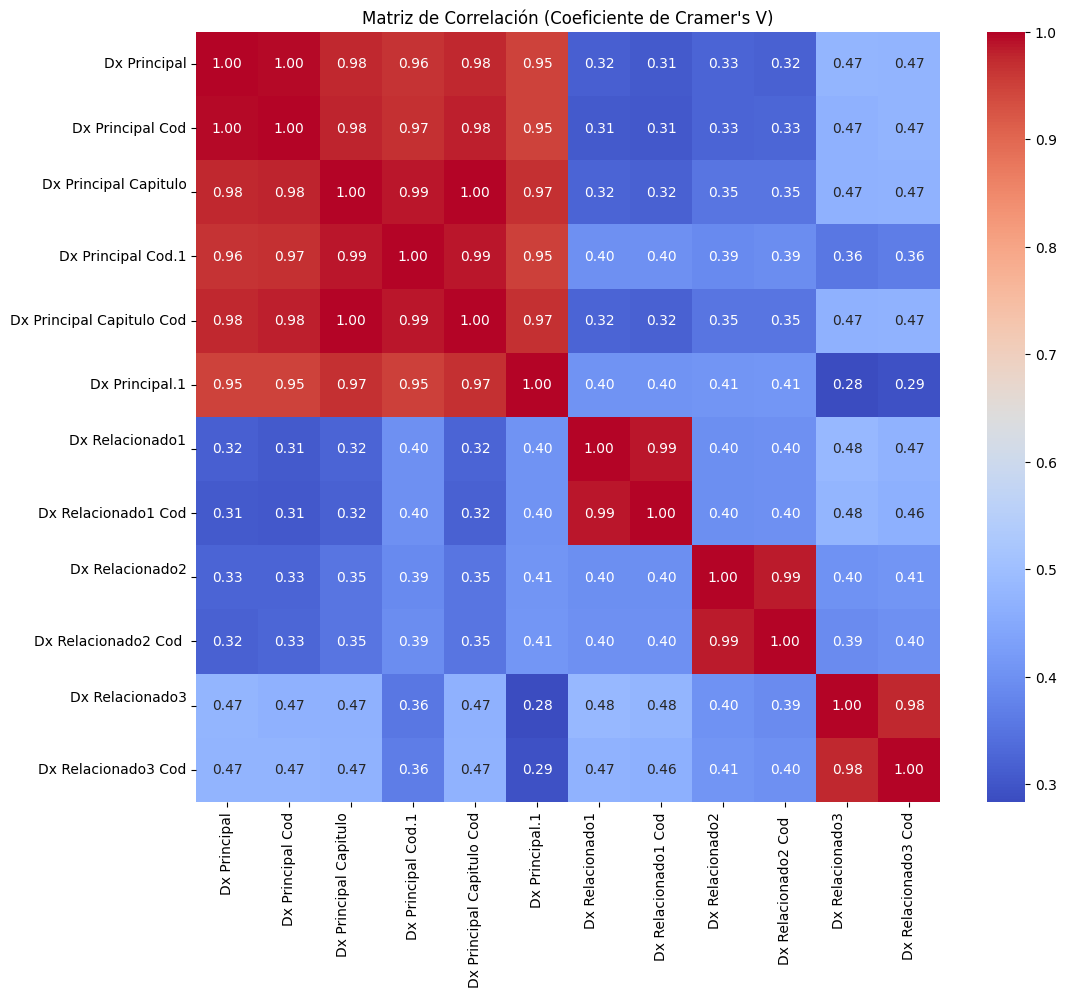

In [175]:
# Seleccionar las columnas referentes al diagnostico
relevant_columns = ['Dx Principal', 'Dx Principal Cod', 'Dx Principal Capitulo\n','Dx Principal Cod.1', 
                    'Dx Principal Capitulo Cod', 'Dx Principal.1', 
                    'Dx Relacionado1\n', 'Dx Relacionado1 Cod', 'Dx Relacionado2\n', 
                    'Dx Relacionado2 Cod ','Dx Relacionado3\n', 'Dx Relacionado3 Cod']

subset_data = data[relevant_columns]

# Calcular el coeficiente de Cramer's V


# Calcular la matriz de correlación usando el coeficiente de Cramer's V
correlation_matrix = pd.DataFrame(index=relevant_columns, columns=relevant_columns)
for i in range(len(relevant_columns)):
    for j in range(len(relevant_columns)):
        if i == j:
            correlation_matrix.iloc[i, j] = 1.0
        else:
            contingency_table = pd.crosstab(subset_data.iloc[:, i], subset_data.iloc[:, j])
            correlation_matrix.iloc[i, j] = cramers_v(contingency_table)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación (Coeficiente de Cramer's V)")
plt.show()

Las variables *Dx Principal, Dx Principal Cod, Dx Principal Capitulo, Dx Principal Capitulo Cod,*, *Dx Principal Cod.1* y *Dx Principal.1* presentan una correlación superior al 95%. Debido a esta alta correlación, se ha decidido conservar únicamente la variable **Dx Principal Cod**, como se mencionó anteriormente. Esto se debe a que **Dx Principal Cod** proporciona una codificación única para el diagnóstico principal de cada consulta de urgencias, lo que la convierte en una representación más concisa y menos redundante de la información diagnóstica. La eliminación de las otras variables reduce la complejidad del conjunto de datos y evita la olinealidad, lo que mejora la eficiencia de los análisis posteriores y los modelos de aprendizaje automático.

Aun así se decidió conservar adicionalmente **Dx Principal Cod.1**, dado que para el modelo se utilizaran dos datasets diferentes para evaluar, uno con **Dx Principal Cod** y otro con **Dx Principal Cod.1**, pues esta última agrupa por capitulo lo que puede reducir el analisis y mejorar el desempeño del modelo. Cabe mencionar que como son dependientes entre ellas, para el modelo NO se conservaran en el mismo dataset sino un dataset con cada una independientemente para ver que cambios se obtienen en el modelo.

De forma similar solo se dejo las variables del codigo del diagnostico para los diagnósticos relacionados 1, 2 y 3.

**Correlación variables relacionadas a la edad**

 Para la edad se realizó un análisis similar al diagnóstico. Al existir alta correlación entre la edad y el grupo de edad, se eliminó el grupo de edad.

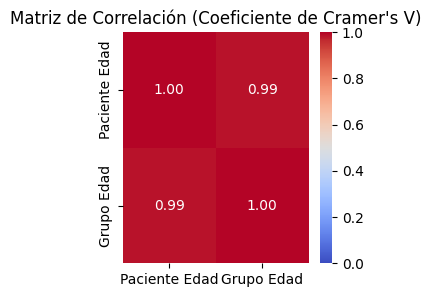

In [176]:
# Seleccionar las columnas relevantes
relevant_columns = ['Paciente Edad', 'Grupo Edad']
subset_data = data[relevant_columns]

# Calcular la matriz de correlación usando el coeficiente de Cramer's V
correlation_matrix = pd.DataFrame(index=relevant_columns, columns=relevant_columns)
for i, col1 in enumerate(relevant_columns):
    for j, col2 in enumerate(relevant_columns):
        if i == j:
            correlation_matrix.iloc[i, j] = 1.0
        else:
            contingency_table = pd.crosstab(subset_data[col1], subset_data[col2])
            correlation_matrix.iloc[i, j] = cramers_v(contingency_table)

# Configurar el tamaño del gráfico
plt.figure(figsize=(3,3))
# mapa de calor
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title("Matriz de Correlación (Coeficiente de Cramer's V)")
plt.show()


**Correlación entre variables de tiempos de atención**

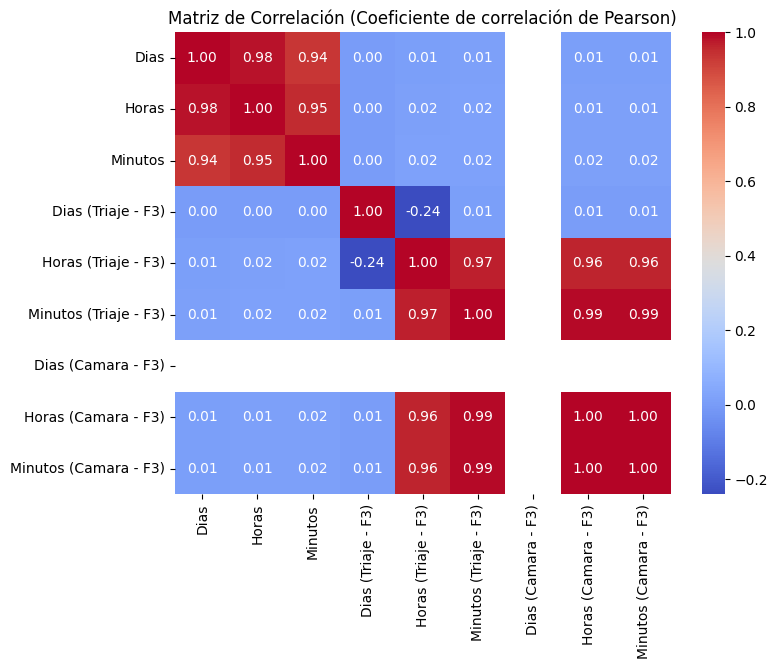

In [177]:
# Seleccionar las columnas relevantes
relevant_columns = ['Dias', 'Horas', 'Minutos','Dias (Triaje - F3)','Horas (Triaje - F3)','Minutos (Triaje - F3)','Dias (Camara - F3)', 'Horas (Camara - F3)', 'Minutos (Camara - F3)']
subset_data = data[relevant_columns]

# Calcular la matriz de correlación usando el coeficiente de correlación de Pearson
correlation_matrix = subset_data.corr(method='pearson')

# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Añadir título
plt.title("Matriz de Correlación (Coeficiente de correlación de Pearson)")

# Mostrar el gráfico
plt.show()

Las variables *Dias, Horas y Minutos* Presentan una correalacion superior al 95% entre ellas, por lo que se ha decidido trabajar unicamente con la variable Minutos, de manera similar sucede para las variables *Horas (Triaje - F3), Minutos (Triaje - F3), Horas (Camara - F3), Minutos (Camara - F3)*, donde, todas hacen referencia al tiempo que tarda el paciente en recibir el triaje, se decide, por lo tanto, trabajar con la variable *Minutos (Camara - F3)*. A estas variables seleccionadas se les aplicara un estudio estadistico para ver la significancia que tienen para el modelo con respecto a la variable *Tipo Egreso (INTERNACION)* mapeada.

De la matriz anterior se observa un espacio vacio para la variable *Dias (Triaje - F3)* se hace un análisis específico para ver que sucede con esta variable:

In [178]:

unique_modalidad_contrato = data['Dias (Triaje - F3)'].unique()
print("Valores únicos de Dias (Triaje - F3):", unique_modalidad_contrato)
# Lleno de ceros y -1 que no tiene sentido, se elimina variable

# Contar ceros y -1
count_zeros = (data['Dias (Triaje - F3)'] == 0).sum()
count_neg_one = (data['Dias (Triaje - F3)'] == -1).sum()

print("Cantidad de ceros en 'Dias (Triaje - F3)':", count_zeros)
print("Cantidad de -1 en 'Dias (Triaje - F3)':", count_neg_one)

Valores únicos de Dias (Triaje - F3): [ 0 -1]
Cantidad de ceros en 'Dias (Triaje - F3)': 39737
Cantidad de -1 en 'Dias (Triaje - F3)': 8


Esta variable es igual para la mayoría de los datos (39737), por esto se eliminará también.

**Variables de tiempos posteriores a hospitalización**

Se descartarán las variables relacionadas con los tiempos posteriores a la hospitalización, como *Tiempo Egreso Urgencias, Tiempo Traslado Hospitalización, Tiempo Cirugía, Tiempo Resolutividad Hosp, Tiempo Resolutividad Cx, Tiempo Resolutividad Alta y Tiempo Resolutividad Total*, ya que estas medidas representan aspectos del proceso de atención médica que ocurren después de que se ha tomado la decisión de hospitalizar al paciente. Por lo tanto, no son relevantes para predecir si un paciente será o no hospitalizado.

**Variable minutos (Camara - F3)**

En este caso, para la variable *Minutos (Camara - F3)*  se encuentran valores negativos, por lo tanto se decide prescindir de esta variable.

In [179]:
import plotly.express as px

# Filtrar los datos para incluir solo aquellos dentro del rango de -25 a 1000 minutos
data_filtrados = data[(data['Minutos (Camara - F3)'] >= -100) & (data['Minutos (Camara - F3)'] <= 1000)]

# Crear un histograma interactivo de los minutos (Camara - F3) con intervalos de 30 minutos
fig = px.histogram(data_filtrados, x='Minutos (Camara - F3)', range_x=[0, 1000], nbins=37, histfunc='count', opacity=0.75, template="plotly",
                   title='Distribución de Minutos (Camara - F3) (-100 a 1000)', color='Tipo Egreso (INTERNACION)')

# Actualizar las trazas para incluir información adicional en el tooltip
fig.update_traces(hovertemplate='Minutos (Camara - F3): %{x}<br>Pacientes: %{y}')

# Actualizar el diseño del gráfico
fig.update_layout(
    xaxis_title='Minutos (Camara - F3)',
    yaxis_title='No. de pacientes',
    bargap=0.1  # Ajustar el espacio entre las barras
)

# Mostrar el histograma
fig.show()

**Análisis de variables: Servicio Admite, Servicio Anterior, Servicio Egreso, Tipo Egreso (INTERNACION), Ubicacion  Urgencias**

En general las 5 variables anteriores separan los pacientes internados/hospitalizados de los que no, sin embargo no lo hacen de forma binaria, sino especificando que servicio fue el que los admitio o en el último que estuvieron, asi como el tipo de forma en que salio de ser internado, si por dada de alta, fallecimiento, etc y un "no aplica" cuando no fueron hospitalizados. 

En consecuencia, estas variables pueden considerarse como redundantes para el estudio que queremos realizar, puesto que desde el principio estamos indicando al modelo si el paciente ha sido hospitalizado o no; esto puede sesgar el modelo y reducir su capacidad para identificar patrones significativos en los datos. Por lo tanto, se van a eliminar estas variables del conjunto de datos. Sin embargo, se puede conservar una columna, como "Tipo Egreso (INTERNACION)", para propósitos de comparación posterior entre los resultados predichos por el modelo y los resultados reales para determinar la efectividad del modelo. Para esto, se deberá procesar la columna y mapear los datos a las categorías "hospitalizado" o "no hospitalizado", lo cual será discutido más adelante.


In [180]:
for columna in ['Servicio Admite', 'Servicio Anterior','Servicio Egreso', 'Tipo Egreso (INTERNACION)','Ubicacion  Urgencias']:
    valores_unicos = data[columna].value_counts()
    print(f"Valores únicos de {columna}:")
    print(valores_unicos)
    print()

Valores únicos de Servicio Admite:
URGENCIAS GENERALES SÓTANO    18977
NO APLICA                     16320
HOSPITALIZACIÓN                2727
URGENCIAS PEDIÁTRICAS          1559
URGENCIAS GENERALES PISO 1      132
CIRUGÍA                          21
AMBULATORIA PROGRAMADA            4
ATENCIÓN PRIORITARIA              3
AMBULATORIA PERSONAL              1
TELETRIAJE                        1
Name: Servicio Admite, dtype: int64

Valores únicos de Servicio Anterior:
NO APLICA                                           16320
PISO 6 UCE                                           1597
SALA DE TRANSICIÓN                                   1553
CAMILLAS SALA 4  URGENCIAS                           1476
CAMILLAS SAI ADULTOS                                  924
CAMILLAS SAI PEDIATRIA                                829
CAMILLAS SALA 2  URGENCIAS                            813
CIRUGIA                                               794
CAMILLAS SALA 3  URGENCIAS                            756
CAMILLAS 

Finalmente se realizó un análisis individual de algunas columnas que presentaban situaciones especiales:

- Las columnas *COD, Año, Dias (Camara - F3), Dias (Camara - Triaje)* presentaban valores únicos, lo cual no permite discriminar entre las clases que se estaban buscando.
- Se eliminaron las varibales de *tipo de identificación, idenitificación del personal* puesto no eran variables explicativas para el modelo.
- Se eliminaron las varibales de *Dias (Triaje - F3) debido a que el 99% de los valores es 0 y el restante es -1*.
- Se eliminó la variable *Urg Fecha triaje* ya que solo representa la Fecha y hora captado al momento de realizar el triage al paciente siendo muy poco descriptiva para el modelo

Se realizó una transformación de dos columnas (edad, unidades de edad) y se definieron todas las edades en años. Lo anterior debido a que no se consideró las unidades de edad como una variable explicativa y que se podía reducir complejidad al modelo al transformar los meses y dias a años.

Finalmente, se transforma la varibale objetivo. Se eliminan los casos de remisión, alta voluntaria y fuga, puesto que el diagnóstico no es claro o no es interno. Se justifica la eliminación también debido a que estos datos solo componen el 4% de la totalidad del dataset. Finalmente, en caso de que el valor sea alta médica o fallece se clasifica como hospitalizado. Como resultado final, el 57% de la totalidad del dataset pertence a la clase hospitalizados y el 43% restante a los no hospitalizados.

**Eliminación y modificación de variables mencionadas anteriormente**

In [181]:
columnas_valores_unicos = {columna: data[columna].nunique() for columna in data.columns}

columnas_ordenadas = sorted(columnas_valores_unicos.items(), key=lambda x: x[1])

variables_un_valor = []
for columna, num_valores_unicos in columnas_ordenadas:
    if num_valores_unicos == 1:
        variables_un_valor.append(columna)

# Eliminamos las variables que tienen un solo valor
data.drop(columns=variables_un_valor, inplace=True)
print(variables_un_valor) # Estas son: ['COD', 'Año', 'Dias (Camara - F3)', 'Dias (Camara - Triaje)']

# Eliminamos la variable unidad y convertimos los meses y dias a unidades de años

data['Paciente Edad'] = data['Paciente Edad'].astype(float)
data.loc[data['Unidad'] == 'Meses', 'Paciente Edad'] /= 12
data.loc[data['Unidad'] == 'Días', 'Paciente Edad'] /= 365


data.drop(columns=['Nro Atencion',
                    'Paciente Tipo Identificacion',
                    'Grupo Edad',
                    'Profesional Identificacion',
                    'Dx Principal',
                    'Dx Principal Capitulo\n',
                    'Dx Principal.1',
                    'Dx Relacionado1\n',
                    'Dx Relacionado2\n',
                    'Dx Relacionado3\n',
                    'Unidad',
                    'Dx Principal Capitulo Cod',
                    'Horas (Camara - F3)',
                    'Horas (Triaje - F3)',
                    'Dias (Triaje - F3)',
                    'Minutos (Camara - F3)',
                    'Minutos (Triaje - F3)',
                    'Servicio Admite', 
                    'Servicio Anterior',
                    'Servicio Egreso',
                    'Dias', 
                    'Horas',
                    'Tiempo Egreso Urgencias',
                    'Tiempo Traslado Hospitalizacion',
                    'Tiempo Cirugia',
                    'Tiempo Resolutividad Hosp',
                    'Tiempo Resolutividad Cx',
                    'Tiempo Resolutividad Alta',
                    'Tiempo Resolutividad Total',
                    'Urg Fecha Triaje',
                    'Ubicacion  Urgencias'],
                    
            inplace=True)

# Eliminar filas donde "Tipo Egreso" sea "REMISIÓN A OTRA INSTITUCIÓN" o "FUGA" al representar pocos datos
data = data[(data['Tipo Egreso (INTERNACION)'] != 'REMISIÓN A OTRA INSTITUCIÓN') & (data['Tipo Egreso (INTERNACION)'] != 'FUGA') & (data['Tipo Egreso (INTERNACION)'] != 'ALTA VOLUNTARIA')]

# Se mapea la columna a hospitalizado o no
data['Tipo Egreso (INTERNACION)'] = data['Tipo Egreso (INTERNACION)'].apply(lambda x: 'HOSPITALIZADO' if x != 'NO APLICA' else x)

data

['COD', 'Año', 'Dias (Camara - F3)', 'Dias (Camara - Triaje)']


,DESCRIPCION,Mes,Tipo Egreso (INTERNACION),Paciente Entidad Responsable Pago,Paciente Modalidad Contrato,Paciente Regimen Afiliacion,Urg Fecha (Camara),Urg Fecha Ingreso,Urg Fecha Consulta F3,Urg Demora1 Consulta (Minutos),...,Modalidad Atencion,Ubicación Triaje,Tiempo Duracion Diligenciamiento F3,Hora Diligenciamiento F3,Minutos,Triaje Re-clasificado,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
0,URGENCIAS ADULTO,ENERO,HOSPITALIZADO,48,EVENTO,SUBSIDIADO,2023-01-15 20:15:31.733000,2023-01-15 20:27:58.643000,2023-01-15 20:42:09.800000,26.633333,...,URGENCIAS,XPRESS,0,0.862616,15.0,NO,True,POBLACIÓN GENERAL,OTRAS ETNIAS,HIPERTENSION
1,URGENCIAS ADULTO,ENERO,NO APLICA,5,PGP,SUBSIDIADO,2023-01-01 14:14:06.223000,2023-01-01 14:36:29.597000,2023-01-01 15:19:13.777000,35.133333,...,URGENCIAS,TRAUMA,18:48,0.638356,56.0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,URGENCIAS ADULTO,ENERO,NO APLICA,65,EVENTO,ESPECIAL,2023-01-07 18:21:27.977000,2023-01-07 18:32:07.223000,2023-01-07 19:43:31.250000,52.050000,...,URGENCIAS,CONSULTORIO 1,18:55,0.821887,79.0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,URGENCIAS ADULTO,ENERO,HOSPITALIZADO,48,EVENTO,CONTRIBUTIVO,2023-01-11 11:19:16.737000,2023-01-11 11:19:16.800000,2023-01-11 17:05:49.203000,0.000000,...,REMITIDO,XPRESS,0,0.712373,0.0,NO,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,URGENCIAS ADULTO,ENERO,HOSPITALIZADO,19,EVENTO,CONTRIBUTIVO,2023-01-07 10:08:49.397000,2023-01-07 10:40:49.950000,2023-01-07 12:05:40.207000,86.850000,...,URGENCIAS,CONSULTORIO 1,30:32,0.503935,108.0,SI,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39739,URGENCIAS ADULTO,DICIEMBRE,NO APLICA,65,EVENTO,ESPECIAL,31/12/2023 2:46:48,31/12/2023 3:07:12,31/12/2023 3:36:56,20.133333,...,URGENCIAS,CONSULTORIO 1,22:27,0.150648,36.0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39740,URGENCIAS ADULTO,DICIEMBRE,HOSPITALIZADO,4,EVENTO,SUBSIDIADO,17/12/2023 2:06:21,17/12/2023 2:21:27,17/12/2023 3:24:04,0.000000,...,REMITIDO,CONSULTORIO 4,NaN,0.141713,74.0,NO,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39741,URGENCIAS ADULTO,DICIEMBRE,NO APLICA,18,EVENTO,NO ASEGURADO,25/12/2023 9:16:35,25/12/2023 9:40:47,25/12/2023 9:57:29,10.900000,...,URGENCIAS,TRAUMA,10:48,0.414919,34.0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39742,URGENCIAS ADULTO,DICIEMBRE,NO APLICA,18,EVENTO,NO ASEGURADO,29/12/2023 11:20:02,29/12/2023 11:48:00,29/12/2023 12:10:45,0.000000,...,URGENCIAS,XPRESS,NaN,0.507465,48.0,NO,True,POBLACIÓN GENERAL,NEGRO (A). MULATO (A). AFROCOLOMBIANO (A) O AF...,ZNO ALTO COSTO


# Análisis de variables restantes para ver si son relevantes para el modelo

Una vez realizado el mapeo a nuestra variable *Tipo Egreso (INTERNACION)* se procede con la realización del estudio de significancia aplicado a las variables *Minutos*, *Minutos (Camara - F3 )* seleccionadas anteriormente en nuestra matriz de correlacion. en este estudio fueron eliminados los datos atipicos de minutos, y fueron graficadas ambas variables en un rango de 0 y 1000 minutos. 

**MINUTOS**

In [182]:
import plotly.express as px

# Filtrar los datos para incluir solo aquellos dentro del rango de 0 a 1000 minutos
data_filtrados = data[(data['Minutos'] >= 0) & (data['Minutos'] <= 1000)]

# Crear un histograma interactivo de los minutos con intervalos de 50 minutos
fig = px.histogram(data_filtrados, x='Minutos', range_x=[0, 1000], nbins=20, histfunc='count', opacity=0.75, template="plotly",
                   title='Distribución de Minutos (0-1000)', color='Tipo Egreso (INTERNACION)')

# Actualizar las trazas para incluir información adicional en el tooltip
fig.update_traces(hovertemplate='Minutos: %{x}<br>Pacientes: %{y}')

# Actualizar el diseño del gráfico
fig.update_layout(
    xaxis_title='Minutos',
    yaxis_title='No. de pacientes',
    bargap=0.1  # Ajustar el espacio entre las barras
)

# Mostrar el histograma
fig.show()

Para la variable *Minutos* al compararla con la salida de interés se encuentra que para los dos primeros rangos 0-49 y 49-99, la proporcion de hospitalizados y no hospitalizados es similar; sin embargo, a partir del minuto 100 la proporción de hospitalizados pasan a estar por encima del 68%, por lo tanto se decide conservar esta variable, dado que parece tener una influencia en la relación de los que son hospitalizados y los que no.

**Análisis de variables con valores nulos**

In [183]:
# Obtener las columnas con valores nulos
variables_con_nulos = data.columns[data.isnull().any()]
# Ordenar los valores por cantidad de valores nulos de mayor a menor
valores_nulos_por_variable_sorted = data[variables_con_nulos].isnull().sum().sort_values(ascending=False)

# Crear la figura de la gráfica
fig = go.Figure()

# Agregar la barra de datos
fig.add_trace(go.Bar(
    x=valores_nulos_por_variable_sorted.values,
    y=valores_nulos_por_variable_sorted.index,
    orientation='h',
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',  # Color de las barras
        line=dict(color='rgba(50, 171, 96, 1.0)', width=1)  # Color del borde de las barras
    )
))

# Establecer el diseño de la gráfica
fig.update_layout(
    title='Cantidad de Valores Nulos por Variable (Ordenado de menor a mayor)',
    xaxis=dict(title='Cantidad de Valores Nulos'),
    yaxis=dict(title='Variables'),
    autosize=False,
    width=800,
    height=600,
    margin=dict(l=150, r=20, t=70, b=70)  # Márgenes para que los ejes y etiquetas sean visibles
)

# Mostrar la gráfica interactiva
fig.show()


Las variables con mayor cantidad de datos nulos son los diagnósticos relacionados, pero no se deben eliminar los pacientes que no tienen estos diagnosticos secundarios, entonces, con el objetivo de preservar la información sobre dichas comorbilidades, que pueden ser relevantes para nuestro modelo, y al mismo tiempo reducir la cantidad de campos nulos, se ha decidido rellenar estos campos vacios con una codificación de 'Vacio', identificada como NA00, aplicado a las variables : *Dx Relacionado1 Cod*, *Dx Relacionado2 Cod*, *Dx Relacionado3 Cod*. Posteriormente cuando se realice el modelo en el próximo trabajo se codificara esta variable con One Hot Encoding.

In [184]:
# Filtrar y imprimir los valores no nulos de la columna 'Dx Relacionado1 Cod'
print(data['Dx Relacionado1 Cod'].dropna())


10       R030
18       R55X
22       I509
24       S900
31       D649
         ... 
39705    Z431
39712    S019
39715    R11X
39722    R509
39726    I10X
Name: Dx Relacionado1 Cod, Length: 5069, dtype: object


In [185]:
# Filtrar y imprimir los valores nulos de la columna 'Dx Relacionado1 Cod'
print(data['Dx Relacionado1 Cod'][data['Dx Relacionado1 Cod'].isna()])


0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
39739    NaN
39740    NaN
39741    NaN
39742    NaN
39744    NaN
Name: Dx Relacionado1 Cod, Length: 33088, dtype: object


In [186]:
# Lista de columnas de comorbilidades
columnas_comorbilidades = ['Dx Relacionado1 Cod', 'Dx Relacionado2 Cod ', 'Dx Relacionado3 Cod']

# Reemplazar los valores NaN por 'NA00' en las columnas de comorbilidades
data[columnas_comorbilidades] = data[columnas_comorbilidades].fillna('NA00')

# Imprimir los primeros registros para verificar los cambios
print(data[columnas_comorbilidades].head())


  Dx Relacionado1 Cod Dx Relacionado2 Cod  Dx Relacionado3 Cod
0                NA00                 NA00                NA00
1                NA00                 NA00                NA00
2                NA00                 NA00                NA00
3                NA00                 NA00                NA00
4                NA00                 NA00                NA00


De la gráfica de valores nulos, se tiene que la columna *Tiempo Duracion Diligenciamiento F3* tiene una gran cantidad de datos vacios vacíos; además, esta variable no es muy relevante para el modelo pues solo establece el tiempo de diligenciamiento. Entonces, se decide eliminarla del modelo, pues no tiene la importancia suficiente para que valga la pena eliminar la cantidad de pacientes que tienen estos valores nulos o llenar los campos nulos con otra técnica.

In [187]:
data.dropna(subset=variables_con_nulos, inplace=True)
data.drop(columns=['Tiempo Duracion Diligenciamiento F3'],inplace=True)

Luego de los anteriores procedimientos, se siguen manteniendo un balance en las clases de clasificación

In [188]:
data['Tipo Egreso (INTERNACION)'].value_counts()

NO APLICA        14791
HOSPITALIZADO    14118
Name: Tipo Egreso (INTERNACION), dtype: int64

## Mes

In [189]:
month_counts = data['Mes'].value_counts().sort_index()
months_order = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
max_count = month_counts.max()
value_counts = month_counts.reset_index()
value_counts.columns = ['Mes', 'Count']
# Histograma
fig = px.histogram(data, x='Mes', nbins=12, histfunc='count', 
                   hover_data={'Mes':False},
                   opacity=0.75, 
                   template="plotly", 
                   color = 'Tipo Egreso (INTERNACION)'
                   ) 
fig.update_layout(title='Distribución de pacientes en el año',
                  yaxis_title='No. de pacientes',
                  hovermode=False)

fig.update_traces(texttemplate='%{y}<br>',
                    textposition='outside')
fig.show()


Dado que la proporción entre pacientes que fueron hospitalizados o no, varía según el mes, consideramos que esta es una variable importante para conservar. Pues es posible que en ciertos meses hayan situaciones especiales que aumenten o disminyan las probabilidades de que un paciente quede hospitalizado al entrar a urgencias. Conservar esta variable puede mejorar la precisión de nuestros análisis al capturar influencias estacionales en las admisiones hospitalarias.

## Diagnostico

In [190]:
diagnosticos_total = (pd.concat([data['Dx Principal Cod'], 
                          data['Dx Relacionado1 Cod'], 
                          data['Dx Relacionado2 Cod '],
                          data['Dx Relacionado3 Cod']]))

diagnosticos_total = diagnosticos_total[diagnosticos_total != 'NA00']
frecuencia_diagnosticos = diagnosticos_total.value_counts()
value_counts = frecuencia_diagnosticos.reset_index()
value_counts.columns = ['Category', 'Count']

total_count = value_counts['Count'].sum()
value_counts['Percentage'] = round((value_counts['Count'] / total_count) * 100, 2)

fig = px.treemap(value_counts, path=['Category'],
                values='Count', 
                hover_data={'Category': False, 'Count': True, 'Percentage':True},
                labels={'Percentage': 'Percentage (%)'})

fig.update_traces(hovertemplate='<b># de pacientes</b>: %{customdata[1]}<br>',
                  texttemplate='%{label}<br>%{customdata[2]}%')
fig.update_layout(title='Resumen de diagnosticos')
fig.show()

La cantidad de diagnósticos presentes en la base de datos es muy amplia, y por tanto no hay una gran cantidad de casos en cada uno para el entrenamiento del modelo. Esto puede generar complicaciones o por el contrario ayudar al modelo en caso de que los diagnósticos menos comunes suelan tener un desenlace fijo, ya sea este que se hospitalizan al final o no. Por esta razón se decide conservar por ahora todos los diagnósticos, cuando se realicé el modelo se evaluará el comportamiento de este al conservar todos los diagnósticos y compararlo con el desempeño al eliminar los diagnósticos con pocos pacientes.

Relación diagnóstico principal (subcapitulo) con la variable objetivo 

In [191]:
result_df = data.groupby(['Dx Principal Cod.1', 'Tipo Egreso (INTERNACION)']).size().reset_index(name='Cantidad')
diagnostico_total = result_df.groupby('Dx Principal Cod.1')['Cantidad'].transform('sum')
servicio_total = result_df.groupby('Tipo Egreso (INTERNACION)')['Cantidad'].transform('sum')
result_df['Porcentaje'] = round((result_df['Cantidad'] / diagnostico_total) * 100, 2)
result_df['Porcentaje Servicio'] = round((result_df['Cantidad'] / servicio_total) * 100, 2)


fig = px.treemap(result_df, path=[px.Constant('Subcapitulos CIE10'),'Dx Principal Cod.1','Tipo Egreso (INTERNACION)'],
                values='Cantidad', 
                custom_data=['Porcentaje', 'Porcentaje Servicio'],
                #labels={'Percentage': 'Percentage (%)'})
)
fig.update_traces(texttemplate='%{label}<br>%{customdata[0]:.2f}%')
fig.update_layout(title='Resumen capitulos CIE10',hovermode=False)
#fig.update_traces(hovertemplate='<b># de pacientes</b>: %{customdata[1]}<br>',
#                  texttemplate='%{label}<br>%{customdata[2]}%')
#fig.update_layout(title='Resumen de diagnosticos')
fig.show()

De la gráfica se puede observar que la proporcion entre hospitalizados o no varía para ciertos grupos de diagnósticos, adicionalmente, el *diagnóstico* es una de las variables que se consideran más importantes a la hora de determinar si se debe hospitalizar un paciente o no. Por lo anterior es fundamental conservar esta variable.

## Edad

Al observar la distribución de las clases con respecto a la edad, fue posible observar que a medida que aumenta la edad es mas probable quedar en hospitalización. Se plantea la hipotesís de que la varibale *Edad* tendrá peso para los modelos de aprendizaje automático y por tanto se conserva.

In [192]:
fig = px.histogram(data, x='Paciente Edad', nbins=100, histfunc='count', 
                   #marginal='rug', # Show individual data points on the margin
                   opacity=0.75, # Adjust the opacity for better visualization
                   template="plotly", # Dark theme for a more stylish look
                   title='Distribucion de edades',
                   color='Tipo Egreso (INTERNACION)'
                   ) 


fig.update_traces(hovertemplate='Edad: %{x}<br>Pacientes: %{y}')
# Update layout for better aesthetics
fig.update_layout(
    xaxis_title='Edad',
    yaxis_title='No. de pacientes',
    #showlegend=True, # No legend for simplicity
    #barmode='overlay', # Overlay the histograms
    bargap=0.1, # Adjust the gap between bars
)

# Show the plot
fig.show()


# Triaje

Al igual que la varibale de *edad*, la variable de *triaje* permite ver diferencias con respecto a la hospitalización o no de pacientes. A triajes de mayor urgencia, es mas probable que la persona quede hospitalizada. Adicionalmente, el valor *no aplica* (que significa que la persona ingreso por urgencias xpress) describe la dinámica real de la sala de urgencias ya que estos pacientes ingresan por emergencias.

In [193]:
result_df = data.groupby(['Clasificacion 1 Triaje \nEnfermeria ', 'Tipo Egreso (INTERNACION)']).size().reset_index(name='Cantidad')
fig = px.bar(result_df,
            y="Clasificacion 1 Triaje \nEnfermeria ",
            x='Cantidad',
            color='Tipo Egreso (INTERNACION)',
            orientation='h',
            opacity=0.75,
            template="plotly",
            )

fig.update_layout(title='Distribución de pacientes en el año',
                  xaxis_title='No. de pacientes',
                  hovermode=False)

fig.update_traces(texttemplate='%{x}<br>')
fig.show()

Se tienen dos variables diferentes para triaje una menciona el nivel del triaje del paciente y la otra es la descripción del nivel de triaje. En este caso es suficiente con conservar el triaje del paciente *Clasificacion 1 Triaje \nEnfermeria*, pues ya se conoce a que nivel de urgencia corresponde cada uno y el modelo deducira la importancia de cada triaje en el entrenamiento.

In [194]:
# Diferencia entre las dos variables de triaje
unique_modalidad_contrato = data['Clasificacion Urg (Nivel)\nEnfermeria '].unique()
print("Valores únicos de Clasificacion Urg 1 Triaje Enfermeria:", unique_modalidad_contrato)

unique_modalidad_contrato = data['Clasificacion 1 Triaje \nEnfermeria '].unique()
print("Valores únicos de Clasificacion 1 Triaje Enfermeria:", unique_modalidad_contrato)

Valores únicos de Clasificacion Urg 1 Triaje Enfermeria: ['II. EMERGENCIA' 'III. URGENCIA' 'NO APLICA' 'I. RESUCITACION'
 'IV.URGENCIA DIFERIDA' 'V. NO URGENTE']
Valores únicos de Clasificacion 1 Triaje Enfermeria: ['TRIAJE 2' 'TRIAJE 3' 'NO APLICA' 'TRIAJE 1' 'TRIAJE 4' 'TRIAJE 5']


In [195]:
data.drop(columns=[
                    'Clasificacion Urg (Nivel)\nEnfermeria '],                    
            inplace=True)

In [196]:
result_df

,Clasificacion 1 Triaje \nEnfermeria,Tipo Egreso (INTERNACION),Cantidad
0,NO APLICA,HOSPITALIZADO,1069
1,NO APLICA,NO APLICA,394
2,TRIAJE 1,HOSPITALIZADO,99
3,TRIAJE 1,NO APLICA,35
4,TRIAJE 2,HOSPITALIZADO,3319
5,TRIAJE 2,NO APLICA,1510
6,TRIAJE 3,HOSPITALIZADO,9559
7,TRIAJE 3,NO APLICA,12673
8,TRIAJE 4,HOSPITALIZADO,50
9,TRIAJE 4,NO APLICA,157


Paciente Modalidad Contrato y Paciente Regimen Afiliacion

In [197]:
# Conteo de valores únicos para cada variable
unique_modalidad_contrato = data['Paciente Modalidad Contrato'].unique()
unique_regimen_afiliacion = data['Paciente Regimen Afiliacion'].unique()

print("Valores únicos de Paciente Modalidad Contrato:", unique_modalidad_contrato)
print("Valores únicos de Paciente Regimen Afiliacion:", unique_regimen_afiliacion)


Valores únicos de Paciente Modalidad Contrato: ['EVENTO' 'PGP' 'CAPITA']
Valores únicos de Paciente Regimen Afiliacion: ['SUBSIDIADO' 'ESPECIAL' 'CONTRIBUTIVO' 'NO ASEGURADO']


In [198]:

# Gráfico de barras para Paciente Modalidad Contrato
fig = px.bar(data['Paciente Modalidad Contrato'].value_counts(), 
             title='Distribución de Modalidad de Contrato',
             labels={'value': 'Frecuencia', 'index': 'Modalidad de Contrato'})
fig.show()

# Gráfico de barras para Paciente Regimen Afiliacion
fig = px.bar(data['Paciente Regimen Afiliacion'].value_counts(), 
             title='Distribución de Regimen de Afiliacion',
             labels={'value': 'Frecuencia', 'index': 'Regimen de Afiliacion'})
fig.show()


In [199]:
# Frecuencia de cada categoría
freq_modalidad_contrato = data['Paciente Modalidad Contrato'].value_counts()
freq_regimen_afiliacion = data['Paciente Regimen Afiliacion'].value_counts()

print("Frecuencia de Paciente Modalidad Contrato:")
print(freq_modalidad_contrato)
print("\nFrecuencia de Paciente Regimen Afiliacion:")
print(freq_regimen_afiliacion)


Frecuencia de Paciente Modalidad Contrato:
EVENTO    24142
PGP        4737
CAPITA       30
Name: Paciente Modalidad Contrato, dtype: int64

Frecuencia de Paciente Regimen Afiliacion:
CONTRIBUTIVO    11957
SUBSIDIADO       9265
ESPECIAL         4997
NO ASEGURADO     2690
Name: Paciente Regimen Afiliacion, dtype: int64


In [200]:
# Tabla de contingencia
contingency_table = pd.crosstab(data['Paciente Modalidad Contrato'], data['Tipo Egreso (INTERNACION)'])

print("Tabla de Contingencia:")
print(contingency_table)


Tabla de Contingencia:
Tipo Egreso (INTERNACION)    HOSPITALIZADO  NO APLICA
Paciente Modalidad Contrato                          
CAPITA                                   1         29
EVENTO                               11134      13008
PGP                                   2983       1754


In [201]:
# Crear la tabla de contingencia
contingency_table = pd.crosstab(data['Paciente Modalidad Contrato'], data['Tipo Egreso (INTERNACION)'])

# Graficar la tabla de contingencia como un heatmap
fig = px.imshow(contingency_table, 
                labels=dict(x="Tipo Egreso (INTERNACION)", y="Paciente Modalidad Contrato", color="Frecuencia"),
                x=contingency_table.columns,
                y=contingency_table.index,
                title='Tabla de Contingencia: Relación entre Paciente Modalidad Contrato y Servicio Admite')
fig.show()


In [202]:
# Crear la tabla de contingencia
contingency_table = pd.crosstab(data['Paciente Regimen Afiliacion'], data['Tipo Egreso (INTERNACION)'])

# Graficar la tabla de contingencia como un heatmap
fig = px.imshow(contingency_table, 
                labels=dict(x="Tipo Egreso (INTERNACION)", y="Paciente Regimen Afiliacion", color="Frecuencia"),
                x=contingency_table.columns,
                y=contingency_table.index,
                title='Tabla de Contingencia: Relación entre Paciente Regimen Afiliacion y Tipo Egreso (INTERNACION)')
fig.show()

In [203]:
# Calcular las proporciones por fila
contingency_table_prop = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Graficar la tabla de contingencia como un heatmap de proporciones
fig = px.imshow(contingency_table_prop, 
                labels=dict(x="Tipo Egreso (INTERNACION)", y="Paciente Regimen Afiliacion", color="Proporción"),
                x=contingency_table_prop.columns,
                y=contingency_table_prop.index,
                title='Tabla de Contingencia: Relación entre Paciente Regimen Afiliacion y Tipo Egreso (INTERNACION) (Proporciones)')
fig.show()


In [204]:
# Calcular las proporciones por fila
contingency_table_prop = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Calcular las proporciones respecto al total de cada tipo de régimen de afiliación
contingency_table_prop_norm = contingency_table_prop.div(contingency_table_prop.sum(axis=0), axis=1)

# Graficar la tabla de contingencia como un heatmap de proporciones respecto al total de cada tipo de régimen de afiliación
fig = px.imshow(contingency_table_prop_norm, 
                labels=dict(x="Tipo Egreso (INTERNACION)", y="Paciente Regimen Afiliacion", color="Proporción"),
                x=contingency_table_prop_norm.columns,
                y=contingency_table_prop_norm.index,
                title='Tabla de Contingencia: Relación entre Paciente Regimen Afiliacion y Tipo Egreso (INTERNACION) (Proporciones respecto al total de cada tipo de régimen de afiliación)')
fig.show()

Grupo poblacional y pertenencias étnicas

In [205]:
# Conteo de valores únicos para cada variable
unique_modalidad_contrato = data['Grupo Poblacional'].unique()
unique_regimen_afiliacion = data['Pertenencia Etnica'].unique()

print("Valores únicos de Grupo Poblacional:", unique_modalidad_contrato)
print("Valores únicos de Pertenencia Etnica:", unique_regimen_afiliacion)

Valores únicos de Grupo Poblacional: ['POBLACIÓN GENERAL' 'VICTIMA DE CONFLICTO ARMADO' 'HABITANTE DE CALLE' 0
 'REINTEGRADO O DESMOVILIZADO']
Valores únicos de Pertenencia Etnica: ['OTRAS ETNIAS'
 'NEGRO (A). MULATO (A). AFROCOLOMBIANO (A) O AFRO DESCENDIENTE'
 'INDÍGENA' 'RROM (GITANO)'
 'RAIZAL (ARCHIPIELAGO DE SAN ANDRES Y PROVIDENCIA)'
 'PALANQUERO DE SAN BASILIO']


In [206]:
# Gráfico de barras para Grupo Poblacional
fig = px.bar(data['Grupo Poblacional'].value_counts(), 
             title='Distribución de Grupo Poblacional',
             labels={'value': 'Frecuencia', 'index': 'Grupo Poblacional'})
fig.show()

# Gráfico de barras para Pertenencia Etnica
fig = px.bar(data['Pertenencia Etnica'].value_counts(), 
             title='Distribución de Pertenencia Etnica',
             labels={'value': 'Frecuencia', 'index': 'Pertenencia Etnica'})
fig.show()

# Dataframe sin variable de salida del modelo

In [207]:
# Se guarda dataframe sin la variable que dice si el paciente es hospitalizado o no para entrenar al modelo
data_sin_egreso = data 
data_sin_egreso.drop(columns=[
                    'Tipo Egreso (INTERNACION)'],                    
            inplace=True)

data

,DESCRIPCION,Mes,Paciente Entidad Responsable Pago,Paciente Modalidad Contrato,Paciente Regimen Afiliacion,Urg Fecha (Camara),Urg Fecha Ingreso,Urg Fecha Consulta F3,Urg Demora1 Consulta (Minutos),Horas (Camara - Triaje),...,Causa Externa (Riesgo),Modalidad Atencion,Ubicación Triaje,Hora Diligenciamiento F3,Minutos,Triaje Re-clasificado,Urgencia Xpress F3,Grupo Poblacional,Pertenencia Etnica,ALTO COSTO
0,URGENCIAS ADULTO,ENERO,48,EVENTO,SUBSIDIADO,2023-01-15 20:15:31.733000,2023-01-15 20:27:58.643000,2023-01-15 20:42:09.800000,26.633333,0.008645,...,ENFERMEDAD GENERAL,URGENCIAS,XPRESS,0.862616,15.0,NO,True,POBLACIÓN GENERAL,OTRAS ETNIAS,HIPERTENSION
1,URGENCIAS ADULTO,ENERO,5,PGP,SUBSIDIADO,2023-01-01 14:14:06.223000,2023-01-01 14:36:29.597000,2023-01-01 15:19:13.777000,35.133333,0.006580,...,ENFERMEDAD GENERAL,URGENCIAS,TRAUMA,0.638356,56.0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
2,URGENCIAS ADULTO,ENERO,65,EVENTO,ESPECIAL,2023-01-07 18:21:27.977000,2023-01-07 18:32:07.223000,2023-01-07 19:43:31.250000,52.050000,0.002238,...,ENFERMEDAD GENERAL,URGENCIAS,CONSULTORIO 1,0.821887,79.0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
3,URGENCIAS ADULTO,ENERO,48,EVENTO,CONTRIBUTIVO,2023-01-11 11:19:16.737000,2023-01-11 11:19:16.800000,2023-01-11 17:05:49.203000,0.000000,0.000000,...,ENFERMEDAD GENERAL,REMITIDO,XPRESS,0.712373,0.0,NO,True,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
4,URGENCIAS ADULTO,ENERO,19,EVENTO,CONTRIBUTIVO,2023-01-07 10:08:49.397000,2023-01-07 10:40:49.950000,2023-01-07 12:05:40.207000,86.850000,0.005968,...,ENFERMEDAD GENERAL,URGENCIAS,CONSULTORIO 1,0.503935,108.0,SI,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39736,URGENCIAS ADULTO,DICIEMBRE,53,EVENTO,NO ASEGURADO,27/12/2023 16:51:35,27/12/2023 17:17:08,27/12/2023 18:02:10,40.583333,0.007431,...,ACCIDENTE DE TRABAJO,URGENCIAS,TRAUMA,0.751505,60.0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39737,URGENCIAS ADULTO,DICIEMBRE,48,EVENTO,CONTRIBUTIVO,26/12/2023 20:18:46,26/12/2023 20:42:05,26/12/2023 21:01:16,12.500000,0.010498,...,ENFERMEDAD GENERAL,URGENCIAS,CONSULTORIO 1,0.875880,28.0,NO,False,HABITANTE DE CALLE,NEGRO (A). MULATO (A). AFROCOLOMBIANO (A) O AF...,ZNO ALTO COSTO
39739,URGENCIAS ADULTO,DICIEMBRE,65,EVENTO,ESPECIAL,31/12/2023 2:46:48,31/12/2023 3:07:12,31/12/2023 3:36:56,20.133333,0.009641,...,ENFERMEDAD GENERAL,URGENCIAS,CONSULTORIO 1,0.150648,36.0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
39741,URGENCIAS ADULTO,DICIEMBRE,18,EVENTO,NO ASEGURADO,25/12/2023 9:16:35,25/12/2023 9:40:47,25/12/2023 9:57:29,10.900000,0.004826,...,ACCIDENTE DE TRANSITO,URGENCIAS,TRAUMA,0.414919,34.0,NO,False,POBLACIÓN GENERAL,OTRAS ETNIAS,ZNO ALTO COSTO
